<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


このラボでは、データの視覚化に焦点を当てます。データセットはRDBMSを介して提供され、SQLクエリを使用して必要なデータを抽出する必要があります。

## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




 - データの分布を視覚化します。

 - 2つの機能間の関係を視覚化します。

 - データの構成と比較を視覚化します。

## Demo: How to work with database


Download the database file.


In [1]:
# !wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [27]:
# !pip install pandas 
# !pip install matplotlib
# 必要なライブラリのインストール


# ライブラリのインポート
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
sns.set_style("darkgrid")
%load_ext sql


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [28]:
# Read the CSV file

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(url)

# Display the first few rows of the data
df.head()



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [29]:
# Create a connection to the SQLite database
%sql sqlite:///survey-data.sqlite

**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


**SQLiteデータベースを作成してデータを挿入**

次に、新しいsqliteデータベース（ `survey-data.sqlite`）を作成し、sqlite3ライブラリを使用してデータフレームからデータをテーブルに挿入しましょう。


In [31]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


**SQLiteデータベースのデータを確認します**   
簡単なクエリを実行することにより、データがSQLiteデータベースに正しく挿入されていることを確認します。

In [32]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


「メイン」という名前のテーブル内の行数を数えます

In [33]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


データベース内のすべてのテーブルの名前を表示するには：

In [34]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


##デモ：クエリごとにグループを実行します
    
たとえば、年齢などの特定の列でデータをグループ化して、各年齢層の回答者の数を取得できます。

In [35]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


##デモ：テーブルの説明

このクエリを使用して、この場合のメインの特定のテーブルのスキーマを取得します。

In [36]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


### データの分布の視覚化

**ヒストグラム**

Compotalのヒストグラム（総補償）をプロットします。

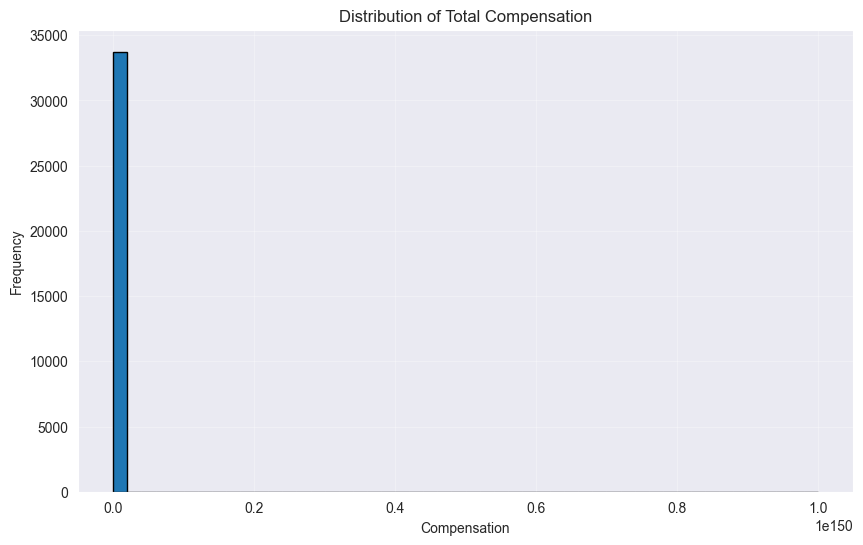

In [37]:
## Write your code here

# データの取得
query = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df_comp = pd.read_sql_query(query, conn)

# ヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(df_comp['CompTotal'], bins=50, edgecolor='black')
plt.title('Distribution of Total Compensation')
plt.xlabel('Compensation')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()



**Box Plots**

Plot a box plot of Age.


**ボックスプロット**

年齢のボックスプロットをプロットします。

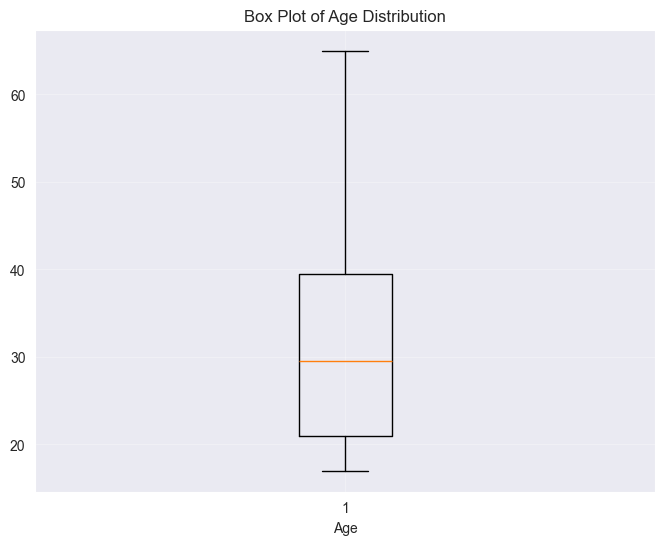

In [55]:
## Write your code here

# Get the data using SQL
query = 'SELECT Age FROM main WHERE Age IS NOT NULL'
df_age = pd.read_sql_query(query, conn)

def convert_age_to_numeric(age_str):
    if age_str == 'Under 18 years old':
        return 17
    elif age_str == '18-24 years old':
        return 21
    elif age_str == '25-34 years old':
        return 29.5
    elif age_str == '35-44 years old':
        return 39.5
    elif age_str == '45-54 years old':
        return 49.5
    elif age_str == '55-64 years old':
        return 59.5
    elif age_str == '65 years or older':
        return 65
    else:
        return None

# Age列を数値に変換
df_age['Age_numeric'] = df_age['Age'].apply(convert_age_to_numeric)
df_age['Age_numeric'].fillna(df_age['Age_numeric'].mean(), inplace=True)

# Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df_age['Age_numeric'])
plt.title('Box Plot of Age Distribution')
plt.xlabel('Age')
plt.grid(True, alpha=0.3)
plt.show()


In [54]:
df_age['Age_numeric'].fillna(df_age['Age_numeric'].mean(), inplace=True)

322

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


### データの関係を視覚化します

**散布図**

年齢とworkexpの散布図を作成します。

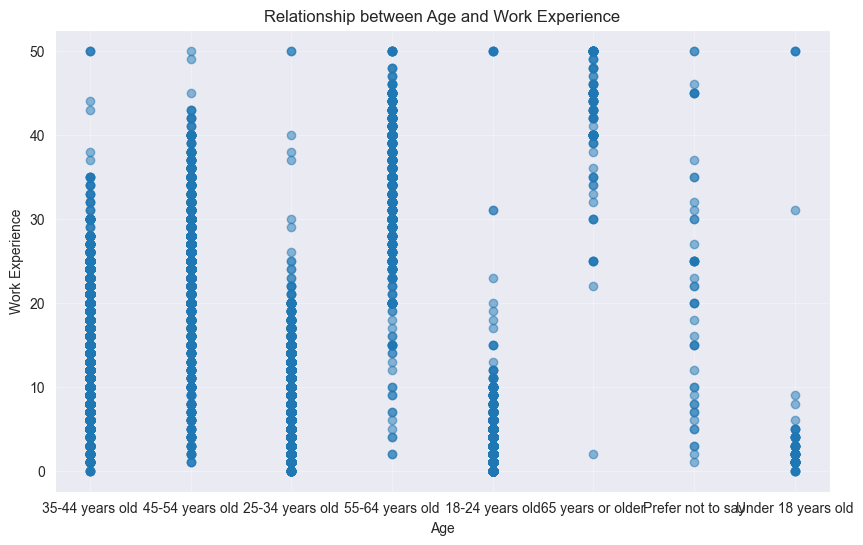

In [56]:
## Write your code here

# Get the data using SQL
query = 'SELECT Age, WorkExp FROM main WHERE Age IS NOT NULL AND WorkExp IS NOT NULL'
df_scatter = pd.read_sql_query(query, conn)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_scatter['Age'], df_scatter['WorkExp'], alpha=0.5)
plt.title('Relationship between Age and Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.grid(True, alpha=0.3)
plt.show()



**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


**バブルプロット**

年齢列をバブルサイズとして使用して、「Times Search」と「Frustration」のバブルプロットを作成します。

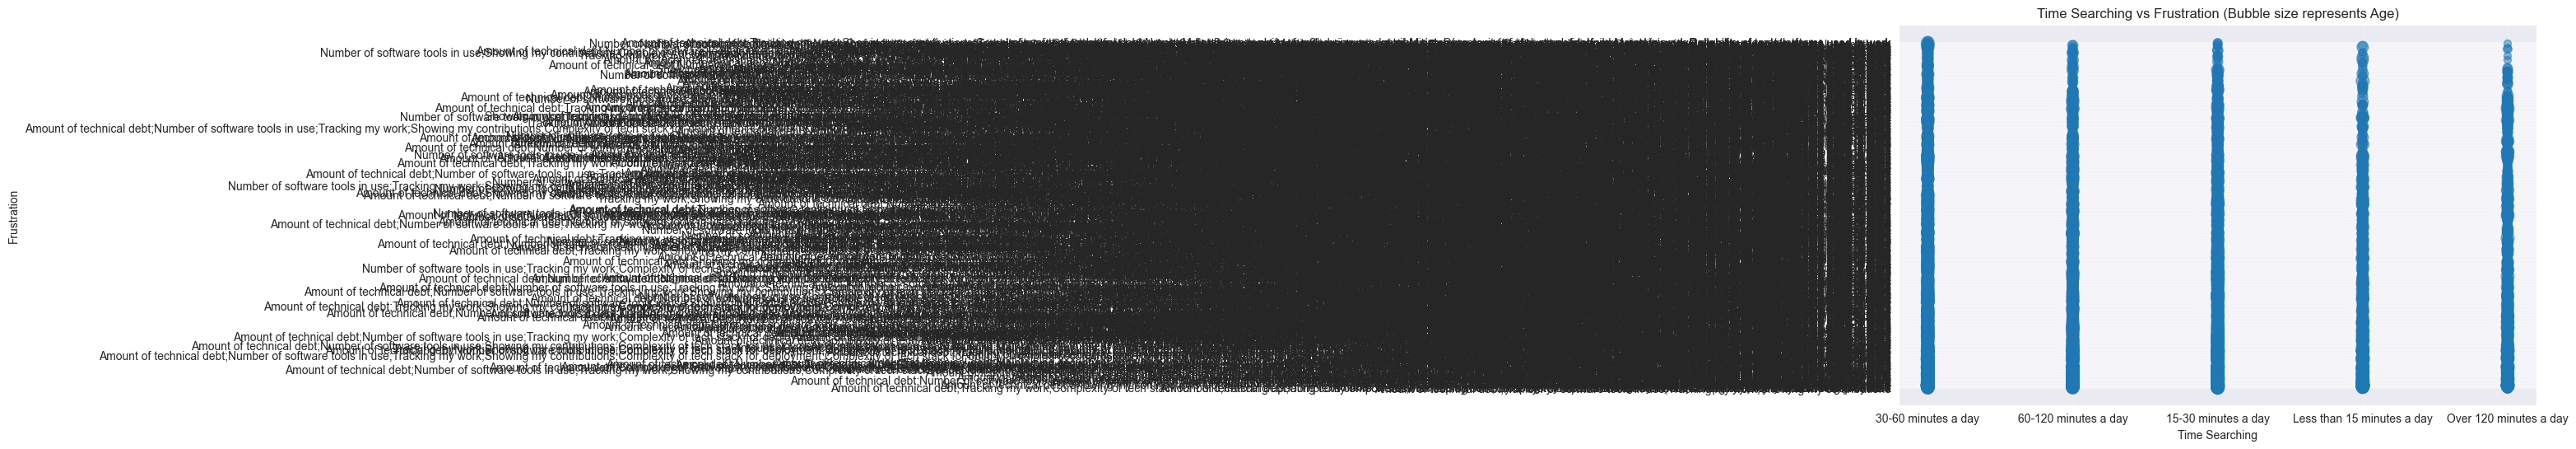

In [14]:
## Write your code here

# Get the data using SQL
query  = 'SELECT TimeSearching, Frustration, Age FROM main WHERE TimeSearching IS NOT NULL AND Frustration IS NOT NULL AND Age IS NOT NULL'
df_bubble = pd.read_sql_query(query, conn)

def convert_age_to_numeric(age_str):
    if age_str == 'Under 18 years old':
        return 17
    elif age_str == '18-24 years old':
        return 21
    elif age_str == '25-34 years old':
        return 29.5
    elif age_str == '35-44 years old':
        return 39.5
    elif age_str == '45-54 years old':
        return 49.5
    elif age_str == '55-64 years old':
        return 59.5
    elif age_str == '65 years or older':
        return 65
    else:
        return None

# Age列を数値に変換
df_bubble['Age_numeric'] = df_bubble['Age'].apply(convert_age_to_numeric)
df_bubble['Age_numeric'].fillna(df_bubble['Age_numeric'].mean(), inplace=True)

# Create the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(df_bubble['TimeSearching'], df_bubble['Frustration'], s=df_bubble['Age_numeric']*2, alpha=0.5)
plt.title('Time Searching vs Frustration (Bubble size represents Age)')
plt.xlabel('Time Searching')
plt.ylabel('Frustration')
plt.grid(True, alpha=0.3)
plt.show()



### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


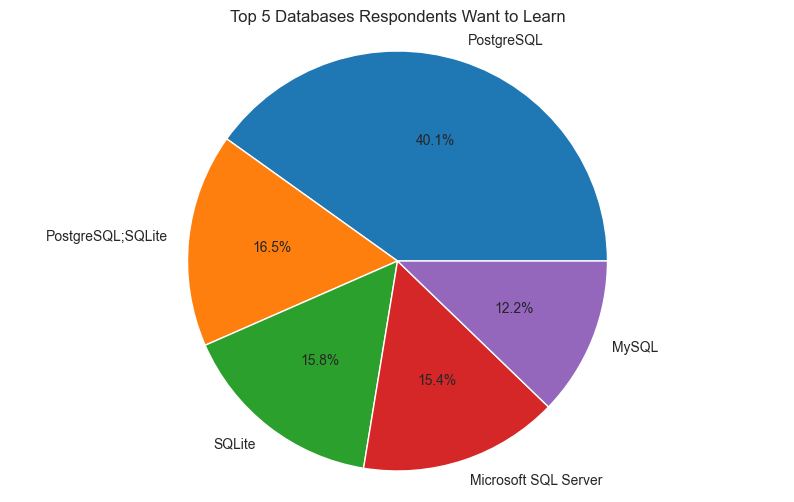

In [15]:
## Write your code here

# Get the data using SQL
query = 'SELECT DatabaseWantToWorkWith, COUNT(*) as count FROM main WHERE DatabaseWantToWorkWith IS NOT NULL GROUP BY DatabaseWantToWorkWith ORDER BY count DESC LIMIT 5'
df_db = pd.read_sql_query(query, conn)

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(df_db['count'], labels=df_db['DatabaseWantToWorkWith'], autopct='%1.1f%%')
plt.title('Top 5 Databases Respondents Want to Learn')
plt.axis('equal')
plt.show()



**積み重ねられたチャート**

年齢30から35の年齢層の中央値「Times Search」と「Timeanswering」の積み重ねられたバーチャートを作成します。


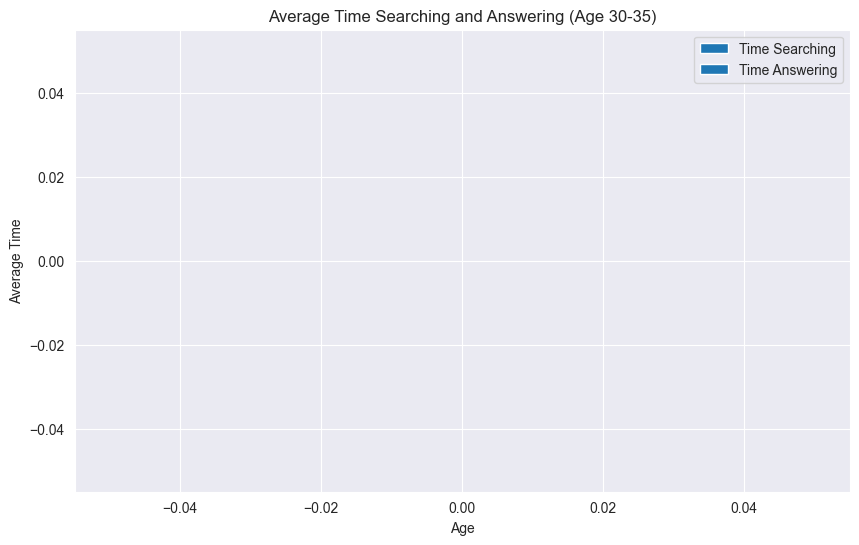

In [73]:
## Write your code here

# Get the data using SQL
query = 'SELECT Age, AVG(TimeSearching) as avg_search, AVG(TimeAnswering) as avg_answer FROM main WHERE Age BETWEEN 30 AND 35 GROUP BY Age'
df_stacked = pd.read_sql_query(query, conn)

# Create the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_stacked['Age'], df_stacked['avg_search'], label='Time Searching')
plt.bar(df_stacked['Age'], df_stacked['avg_answer'], bottom=df_stacked['avg_search'], label='Time Answering')
plt.title('Average Time Searching and Answering (Age 30-35)')
plt.xlabel('Age')
plt.ylabel('Average Time')
plt.legend()
plt.grid(True, alpha=1)
plt.show()



### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


### データの比較の視覚化

**ラインチャート**

45〜60歳までのすべての年齢の中央値「comptotal」をプロットします。

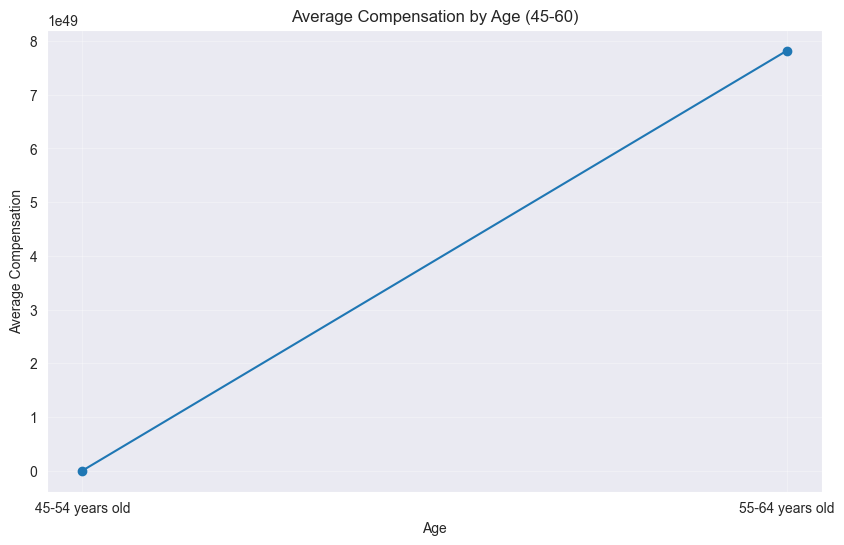

In [74]:
## Write your code here

# Get the data using SQL
df_line = 'SELECT Age, AVG(CompTotal) as avg_comp FROM main WHERE Age BETWEEN 45 AND 60 GROUP BY Age ORDER BY Age'
df_line = pd.read_sql_query(df_line, conn)

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(df_line['Age'], df_line['avg_comp'], marker='o')
plt.title('Average Compensation by Age (45-60)')
plt.xlabel('Age')
plt.ylabel('Average Compensation')
plt.grid(True, alpha=0.3)
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


**バーチャート**

「MainBranch」列を使用して、水平バーチャートを作成します。

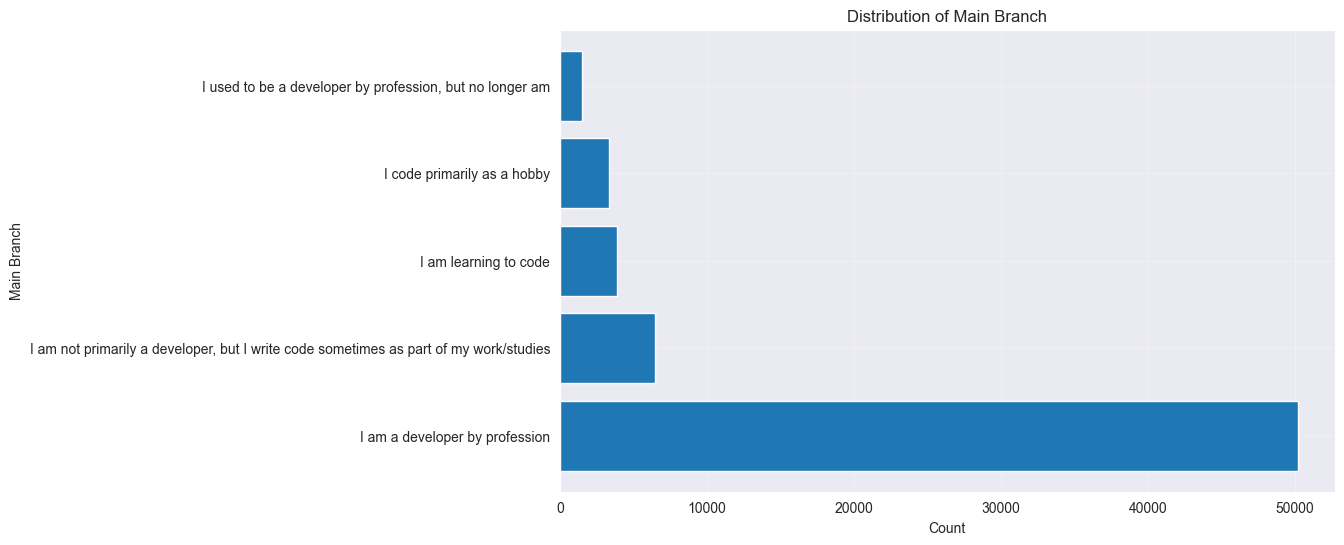

In [75]:
## Write your code here

# Get the data using SQL
df_bar = 'SELECT MainBranch, COUNT(*) as count FROM main GROUP BY MainBranch ORDER BY count DESC'
df_bar = pd.read_sql_query(df_bar, conn)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_bar['MainBranch'], df_bar['count'])
plt.title('Distribution of Main Branch')
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.grid(True, alpha=0.3)
plt.show()


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [76]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
